In [7]:
pip show numpy

Name: numpy
Version: 1.26.4
Summary: Fundamental package for array computing in Python
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: BSD-3-Clause
Location: /usr/local/lib/python3.11/dist-packages
Requires: mkl, mkl-service, mkl_fft, mkl_random, mkl_umath, tbb4py
Required-by: accelerate, albucore, albumentations, ale-py, arviz, astropy, autograd, bayesian-optimization, bigframes, blis, blosc2, bokeh, Boruta, Bottleneck, bqplot, Cartopy, catboost, category_encoders, cesium, chex, clarabel, cmdstanpy, contourpy, cudf-cu12, cufflinks, cuml-cu12, cupy-cuda12x, cuvs-cu12, cvxpy, cyipopt, dask-cuda, dask-cudf-cu12, datasets, db-dtypes, deap, diffusers, dipy, dm-tree, dopamine_rl, easyocr, eli5, fasttext, featuretools, flax, folium, fury, geemap, gensim, geopandas, gradio, gym, gymnasium, h5py, hdbscan, hep_ml, highspy, holoviews, hyperopt, ImageHash, imageio, imbalanced-learn, ipympl, jax, jaxlib, kaggle-environments, keras, keras-core, keras-hub, 

# Premier exemple

In [9]:
import pandas as pd
from sklearn import tree

In [10]:
data = pd.read_csv("/kaggle/input/barbecue/barbecue.csv")

In [11]:
y_train = data['barbecue']
X_train = data
del X_train['barbecue']

In [12]:
model = tree.DecisionTreeClassifier(
    criterion='entropy'
)
model.fit(X_train, y_train)
feature_names = ['Meteo', 'Amis', "Vent", 'Jour']
target_names = ['non', 'oui']

In [13]:
import matplotlib.pyplot as plt

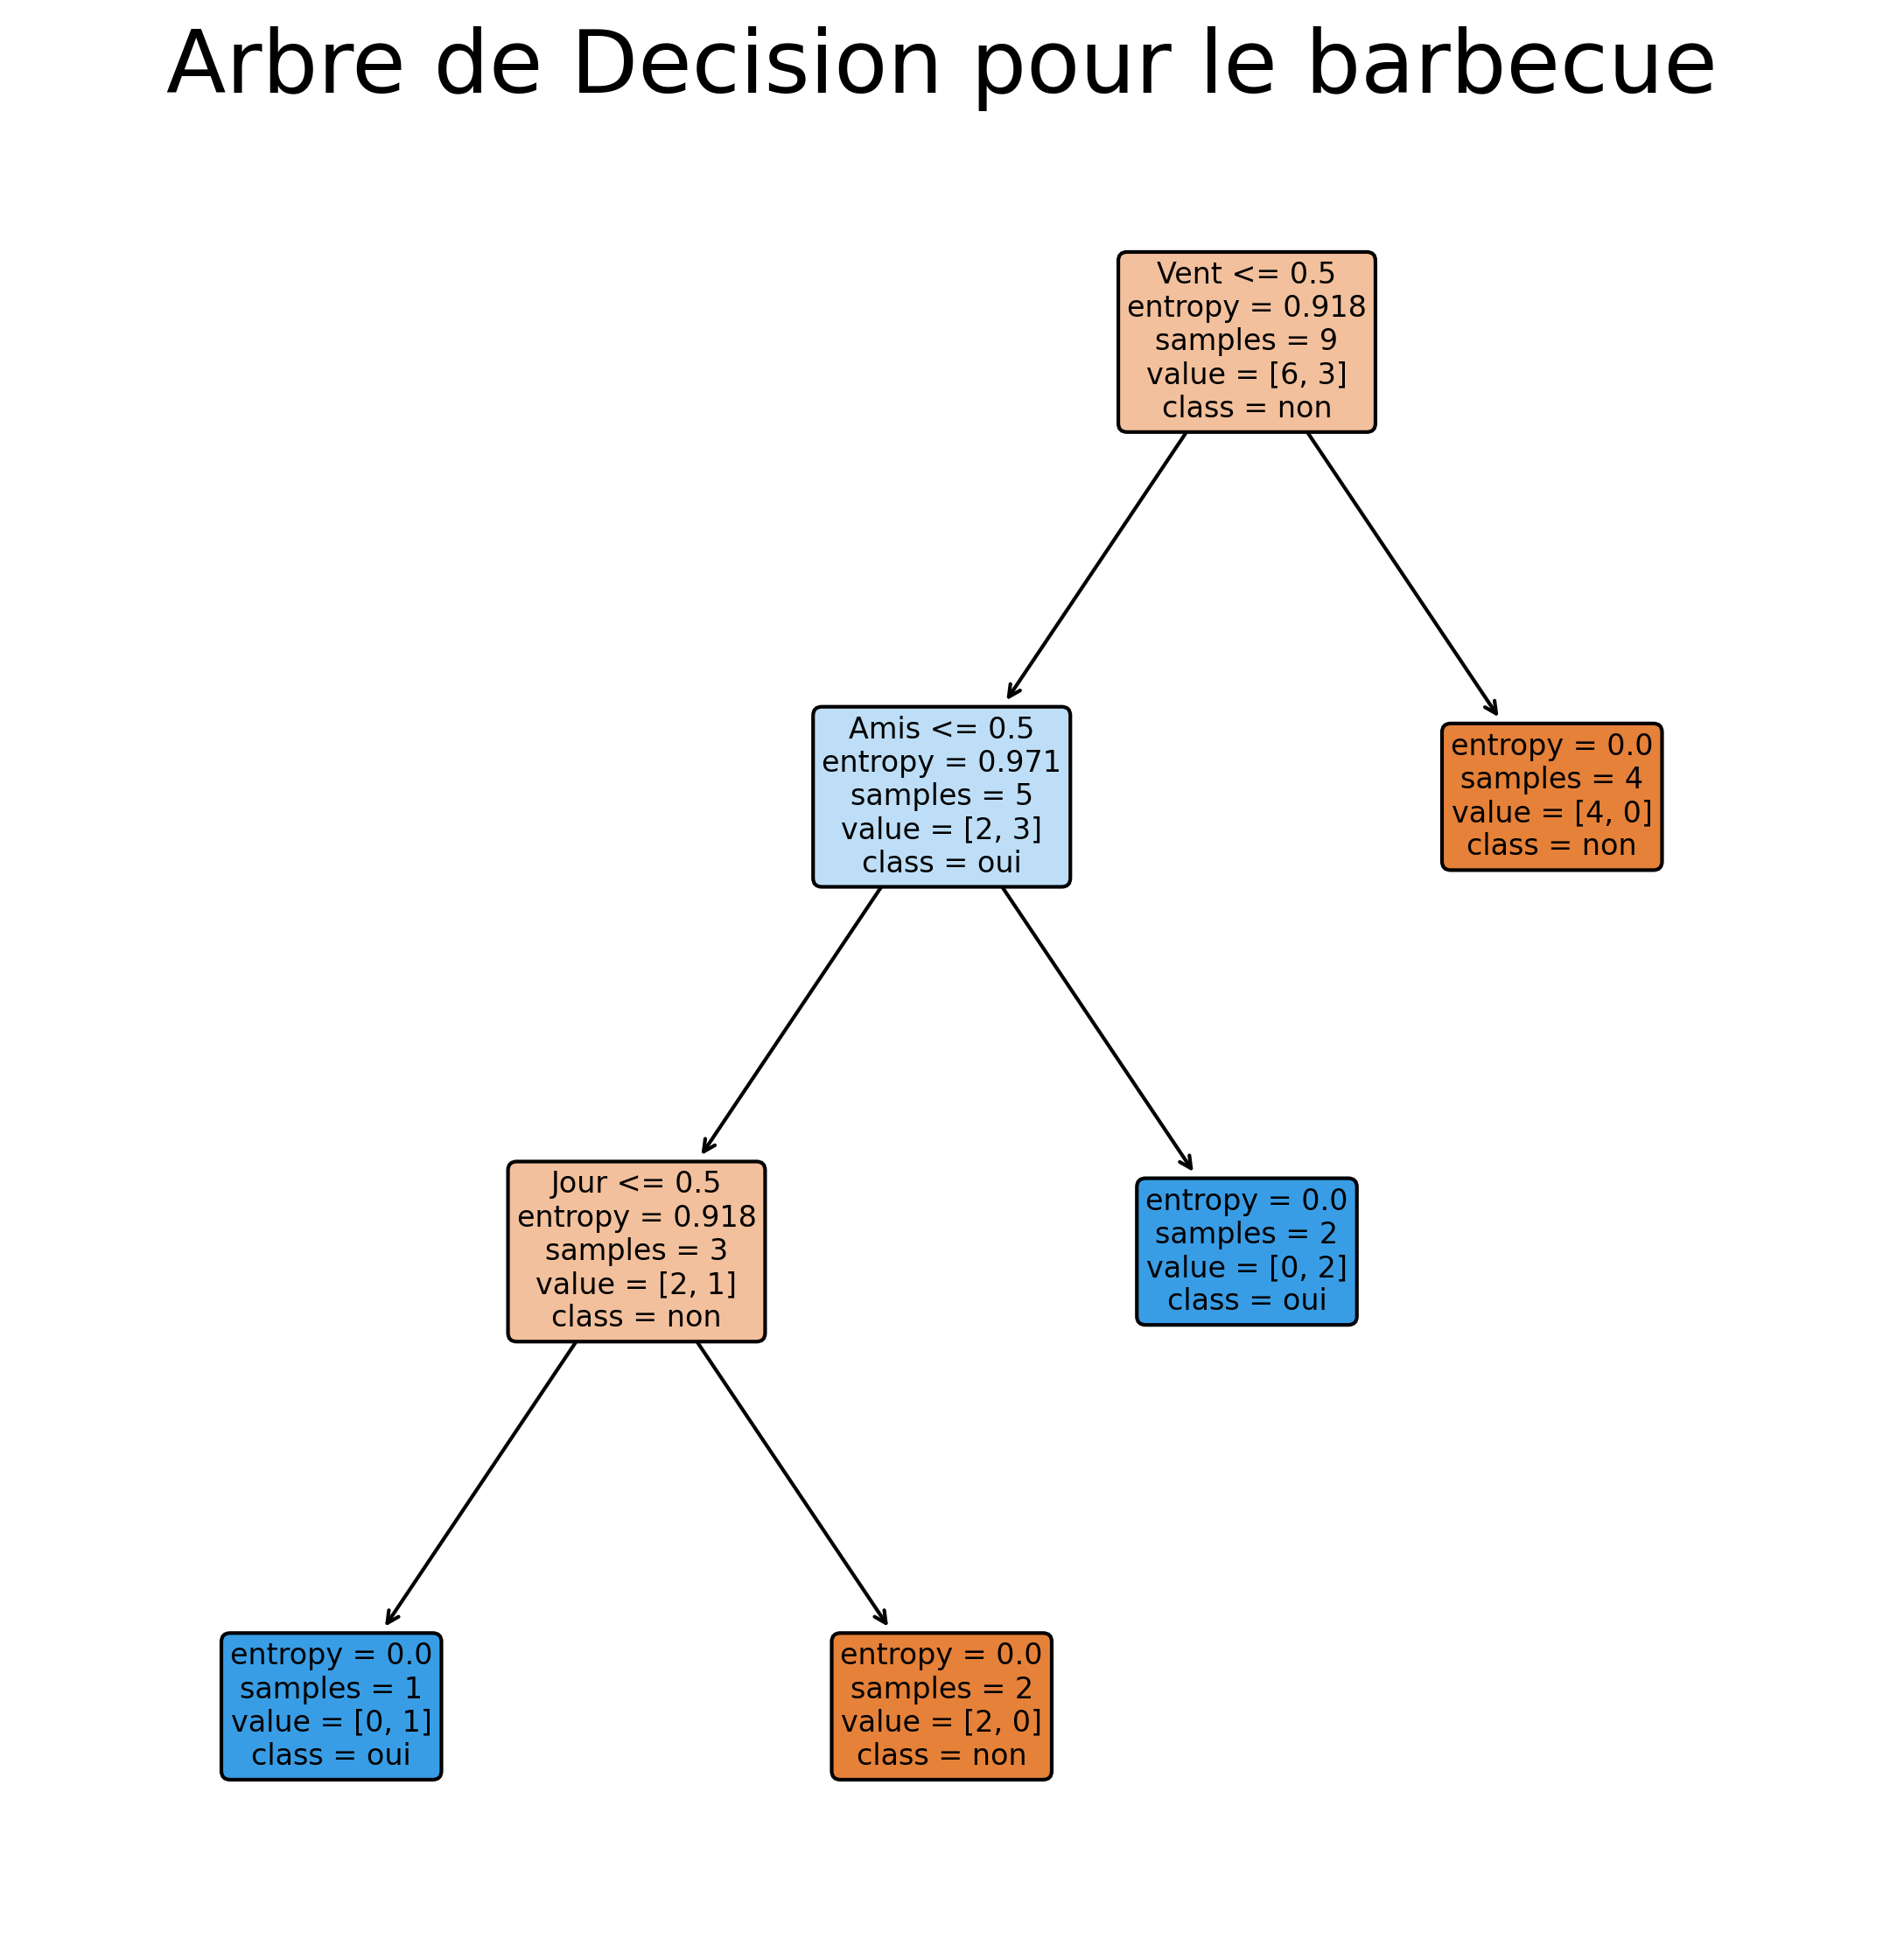

In [14]:
plt.figure(figsize=(9,9), dpi=300)
tree.plot_tree(
    model,
    feature_names=feature_names,
    class_names=target_names,
    filled=True,
    rounded=True,
    fontsize=8,
)
plt.title("Arbre de Decision pour le barbecue", fontsize=24)
plt.show()


# Classification

In [15]:
import pandas as pd

Nous allons travailler sur la base de données glass. Il s’agit d’apprendre le type d’un verre (batiment, voiture,
...) en fonction de différentes caractéristiques chimiques, sa description est fournie sur le site Kaggle : https://www.kaggle.com/datasets/uciml/glass

In [16]:
df = pd.read_csv("/kaggle/input/glass/glass.csv")

In [17]:
df.columns.tolist()

['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']

### Tâche 1 : Calculer les statistiques (moyenne et écart-type) des variables explicatives.

In [18]:
df.describe()

RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
min      5.430000    0.000000    0.000000    1.000000  
25%      8.240000    0.000000    0.000000    1.000000  
50%      8.600000    0.000000    0.000000    2.000000  
75%      9.172500    0.000000    0.100000    3.000000  
max     16.190000    3.150000    0.510000    7.000000

### Tâche 2 : Combien y a-t-il de type de verre et combien y a-t-il d’exemples de chaque classe ?

In [19]:
df['Type'].unique()

array([1, 2, 3, 5, 6, 7])

In [20]:
df['Type'].value_counts()

Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

### Tâche 3 : Normalisez les données et séparez le jeu de données en deux : 70% pour l’apprentissage, 30% pour le test

In [21]:
y = df['Type']
X = df.copy()
del X['Type']

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.7)

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
min_max_scaler = MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)

In [26]:
X_test_minmax = min_max_scaler.transform(X_test)

### Tâche 4 : Construisez un arbre de décision et entraînez le sur la base d’apprentissage. Une fois l’apprentissage terminé, visualiser l’arbre.

In [27]:
from sklearn import tree

In [28]:
model = tree.DecisionTreeClassifier(criterion='entropy')
model.fit(X_train_minmax, y_train)

DecisionTreeClassifier(criterion='entropy')

In [29]:
df['Type'].unique().tolist()

[1, 2, 3, 5, 6, 7]

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 30), dpi=600)
tree.plot_tree(
    model,
    feature_names=df.columns.tolist(),
    class_names=['1', '2', '3', '5', '6', '7'],
    filled=True,
    rounded=True,
    fontsize=8
)
plt.title("Arbre de decision pour GLASS Dataset", fontsize=12)
plt.show()
plt.savefig("/kaggle/working/glass_DTC.png")

<Figure size 640x480 with 0 Axes>

### Tâche 5 : Évaluer la performance de votre arbre sur l’ensemble de test en utilisant les métriques suivante : précision, matrice de confusion, rapport de classification

In [31]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test_minmax)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.676923076923077

In [32]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
matrix

array([[16,  4,  1,  0,  0,  0],
       [ 9, 14,  1,  0,  1,  1],
       [ 2,  2,  3,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  0,  7]])

In [33]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.59      0.76      0.67        21
           2       0.70      0.54      0.61        26
           3       0.60      0.43      0.50         7
           5       1.00      1.00      1.00         2
           6       0.67      1.00      0.80         2
           7       0.88      1.00      0.93         7

    accuracy                           0.68        65
   macro avg       0.74      0.79      0.75        65
weighted avg       0.68      0.68      0.67        65



### Tâche 6 : Changez les valeurs de paramètres max_depth et min_samples_leaf . Que constatez-vous ?

In [34]:
model1=tree.DecisionTreeClassifier(
    criterion="entropy",
    max_depth=6,
    min_samples_leaf=5
)
model1.fit(X_train_minmax, y_train)
y_pred = model1.predict(X_test_minmax)
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           1       0.58      0.86      0.69        21
           2       0.71      0.46      0.56        26
           3       0.75      0.43      0.55         7
           5       1.00      1.00      1.00         2
           6       0.50      1.00      0.67         2
           7       1.00      1.00      1.00         7

    accuracy                           0.68        65
   macro avg       0.76      0.79      0.74        65
weighted avg       0.70      0.68      0.66        65



### Tâche 7 : Le problème ici étant particulièrement simple, refaites une division apprentissage/test avec 10% des données en apprentissage et 90% test. Calculez le taux d’éléments mal classifiés sur l’ensemble de test. Faites varier (ou mieux, réalisez une recherche par grille avec GridSearchCV) les valeurs des paramètres max_depth et min_samples_leaf pour mesurer leur impact sur ce score.

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

In [36]:
from sklearn.metrics import accuracy_score
model2 = tree.DecisionTreeClassifier(criterion="entropy")
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
mal_classifie = 1 - accuracy
print(mal_classifie)

0.18181818181818177


In [37]:
from sklearn.model_selection import GridSearchCV
max_depth = [1, 2, 3, 5, 6, 7]
min_samples_split = [2, 3, 5, 10, 15, 20]
param_grid = {
    "max_depth": max_depth,
    "min_samples_split": min_samples_split
}
grid_search = GridSearchCV(
    estimator=tree.DecisionTreeClassifier(criterion="entropy"),
    param_grid=param_grid,
    scoring="accuracy",
    cv=5
)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(criterion='entropy'),
             param_grid={'max_depth': [1, 2, 3, 5, 6, 7],
                         'min_samples_split': [2, 3, 5, 10, 15, 20]},
             scoring='accuracy')

In [38]:
best_model = grid_search.best_estimator_
print("best parameters founded", grid_search.best_params_)
print("best scoring", grid_search.best_score_)

best parameters founded {'max_depth': 7, 'min_samples_split': 2}
best scoring 0.6357624831309042


In [39]:
y_pred = best_model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.71      1.00      0.83         5
           2       0.83      0.62      0.71         8
           3       0.00      0.00      0.00         0
           5       1.00      0.50      0.67         2
           6       1.00      0.67      0.80         3
           7       0.80      1.00      0.89         4

    accuracy                           0.77        22
   macro avg       0.72      0.63      0.65        22
weighted avg       0.84      0.77      0.78        22



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Saving the model

In [40]:
import pickle

with open("glass_classifier.pkl", "wb") as f:
    pickle.dump(best_model, f)

In [41]:
import joblib
joblib.dump(best_model, "glass_classifier.joblib")

['glass_classifier.joblib']

# Régression

Les arbres de décision peuvent aussi être utilisés pour des problèmes de re- gression. Dans cette seconde
partie, nous allons étudier la base de données winequality-red. Il s’agit de prédire la qualité d’un vin en fonction
de différentes caractéristiques chimiques. La dernière colonne correspond à la qualité du vin, représentée par une
note entière.
Comme pour la première partie, récupérez la base, analysez les données, et effectuez un apprentissage avec les
arbres de décision. Vous devez utiliser les bibliothèques suivantes :
```
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
```

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
data = pd.read_csv("/kaggle/input/winequality-red/winequality-red.csv")

In [3]:
    data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [5]:
data['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [10]:
from sklearn.preprocessing import MinMaxScaler
y = data['quality']
X = data.copy()
del X['quality']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.10, train_size=0.90)

In [44]:
min_max_scaler = MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_test_minmax = min_max_scaler.transform(X_test)

In [46]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train_minmax, y_train)
y_pred = dtr.predict(X_test_minmax)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2score = r2_score(y_test, y_pred)
print(f"mean absolute error: {mae}")
print(f"mean squared error: {mse}")
print(f"r2 score: {r2score} ")

mean absolute error: 0.4875
mean squared error: 0.6875
r2 score: -0.03050529890508802 


In [47]:
from sklearn.model_selection import GridSearchCV

max_depth = [i for i in range(1,10)]
min_samples_split = [i for i in range(2,20)]
param_grid = {
    "max_depth": max_depth,
    "min_samples_split": min_samples_split
}
grid_search = GridSearchCV(
    estimator=DecisionTreeRegressor(),
    scoring="neg_mean_squared_error",
    param_grid=param_grid,
    cv=5
)

grid_search.fit(X_train_minmax, y_train)
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("best params", best_params)
print("best score", best_score)


best params {'max_depth': 5, 'min_samples_split': 7}
best score -0.4788402320101975


In [48]:
y_pred = best_model.predict(X_test_minmax)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2score = r2_score(y_test, y_pred)
print(f"mean absolute error: {mae}")
print(f"mean squared error: {mse}")
print(f"r2 score: {r2score} ")

mean absolute error: 0.524489922479002
mean squared error: 0.4568900465295679
r2 score: 0.3151598342316917 
